#**Maestría en Inteligencia Artificial Aplicada**
##Curso: Visión Computacional para Imágenes y Video
###Tecnológico de Monterrey

#Equipo 24
* Arthur Jafed Zizumbo Velasco
* Carlos Aaron Bocanegra Buitron
* Edgar Oviedo Navarro
* Luis Santiago Vázquez Mancilla

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


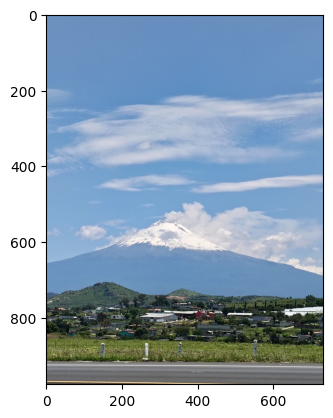

In [47]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Vision/Elpopo_202507131250.jpg"
img1 = mpimg.imread(ruta)
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [48]:
img1.shape

(977, 733, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

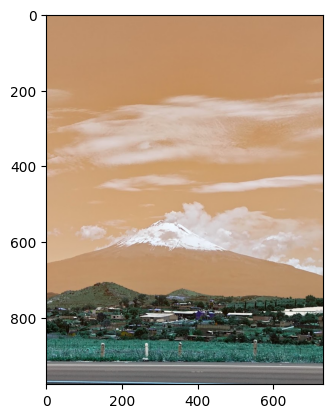

In [49]:
img2 = cv2.imread(ruta)
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(shape=(977, 733, 3))


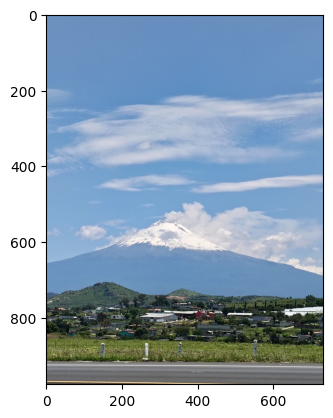

In [50]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


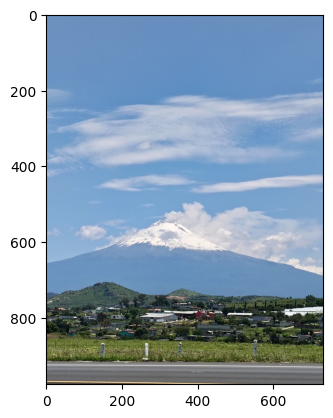

In [51]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open(ruta)
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [52]:
img3 = np.array(img3)
img3.shape

(977, 733, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

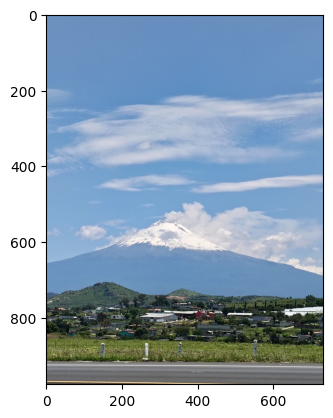

In [53]:
# Save the image
np.save(ruta, img3)

# Load the image
img3 = np.load('ruta.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 733 x 977
New size: 200 x 200


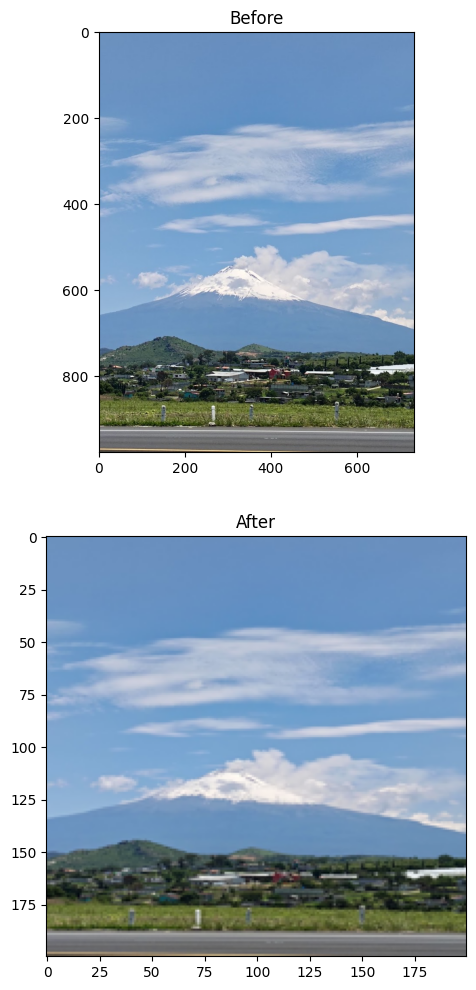

In [54]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 733 x 977
Scaled size: 150 x 200
New size: 200 x 200


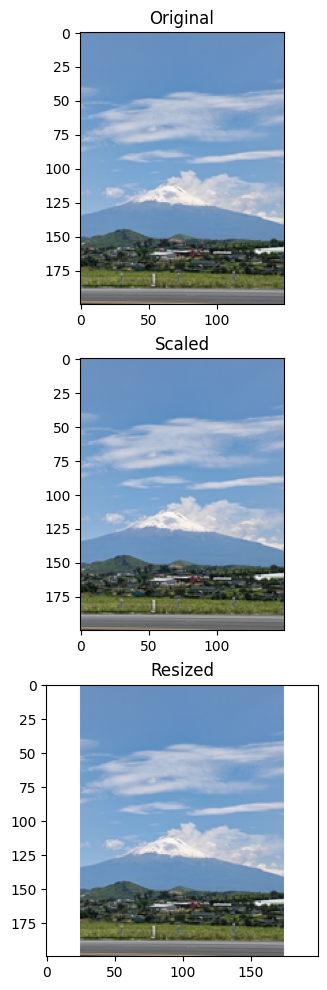

In [55]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.LANCZOS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

# Nota:
### Image.ANTIALIAS fue deprecado en Pillow 9.1.0 y removido en Pillow 10 (julio 2023).
### Fuente: Pillow Release Notes (2022).
### Reemplazar por Image.Resampling.LANCZOS

#Referencias

Pillow Project. (2022, abril 1). Pillow Release Notes 9.1.0: Constants deprecated (Image.ANTIALIAS etc.). En Pillow Documentation. Recuperado de https://pillow.readthedocs.io/en/stable/releasenotes/9.1.0.html

## Negative Images <a class="anchor" id="negative"></a>

In [56]:
orig_img = cv2.imread(ruta)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

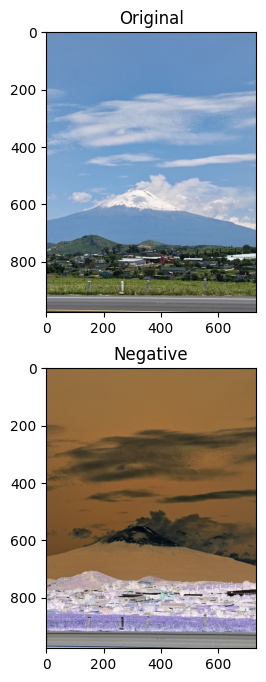

In [57]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [58]:
orig_img = cv2.imread(ruta)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

/tmp/ipython-input-19142164.py:5: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(orig_img))
/tmp/ipython-input-19142164.py:5: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(orig_img))
/tmp/ipython-input-19142164.py:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))
/tmp/ipython-input-19142164.py:6: RuntimeWarning: invalid value encountered in multiply
  log_img = c * (np.log(orig_img + 1))
/tmp/ipython-input-19142164.py:10: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype = np.uint8)


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

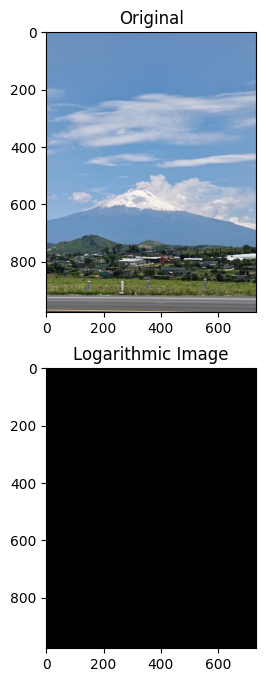

In [59]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

**Nota:**
 En el libro de González y Woods (2018) se presenta la transformación logarítmica **s=c⋅log(1+r)**, la cual sirve para resaltar detalles en regiones oscuras y comprimir intensidades altas. Al aplicarla directamente sobre mi imagen en formato uint8, la salida se veía negra. Investigando en la documentación de NumPy confirmé que la función log requiere trabajar con datos en coma flotante para evitar errores de cálculo, y en la documentación de OpenCV encontré que es necesario normalizar los resultados al rango [0, 255] para poder visualizarlos correctamente en 8 bits. Con esos dos ajustes (conversión a float y normalización), la transformación produjo el efecto esperado.

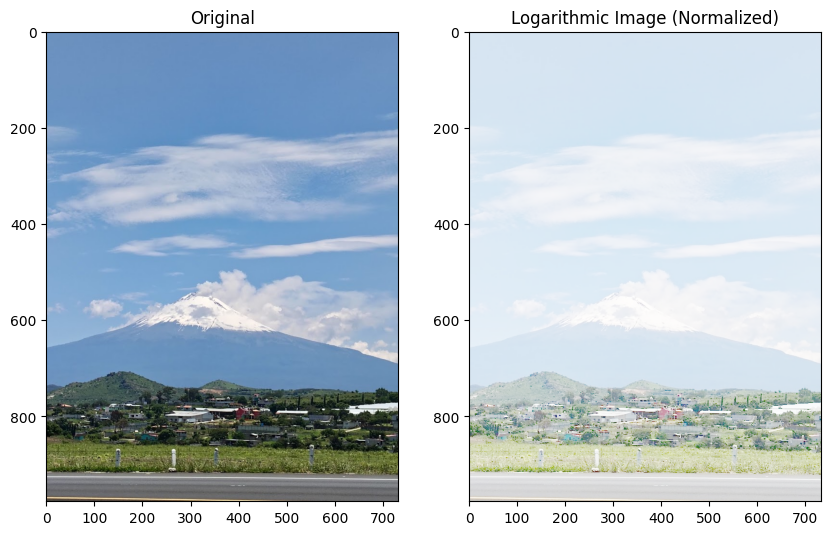

In [60]:
# Cargar la imagen
orig_img = cv2.imread(ruta)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Aplicar transformación logarítmica
orig_img_float = orig_img.astype(np.float32)  # convertir a float para evitar overflow
log_img = np.log1p(orig_img_float)            # log(1 + pixel)

# Normalizar el resultado al rango 0–255
log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
log_img = np.uint8(log_img)

# Mostrar imágenes comparativas
fig = plt.figure(figsize=(10, 8))

a = fig.add_subplot(1, 2, 1)
plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(1, 2, 2)
plt.imshow(log_img)
a.set_title('Logarithmic Image (Normalized)')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

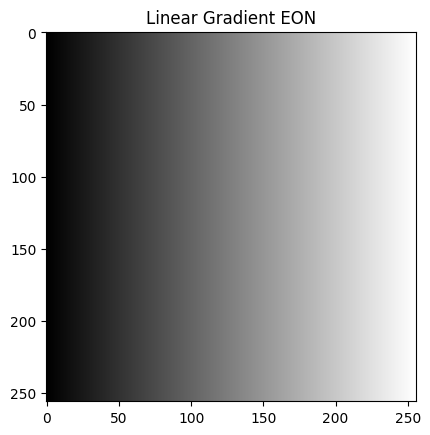

In [61]:
# Crear un gradiente de 0 a 255 (en escala de grises)
gradient = np.tile(np.arange(0, 256, dtype=np.uint8), (256, 1))

# Guardar como imagen PNG
cv2.imwrite("linear_gradient EON.png", gradient)

# Mostrar para verificar
plt.imshow(gradient, cmap='gray')
plt.title("Linear Gradient EON")
plt.show()

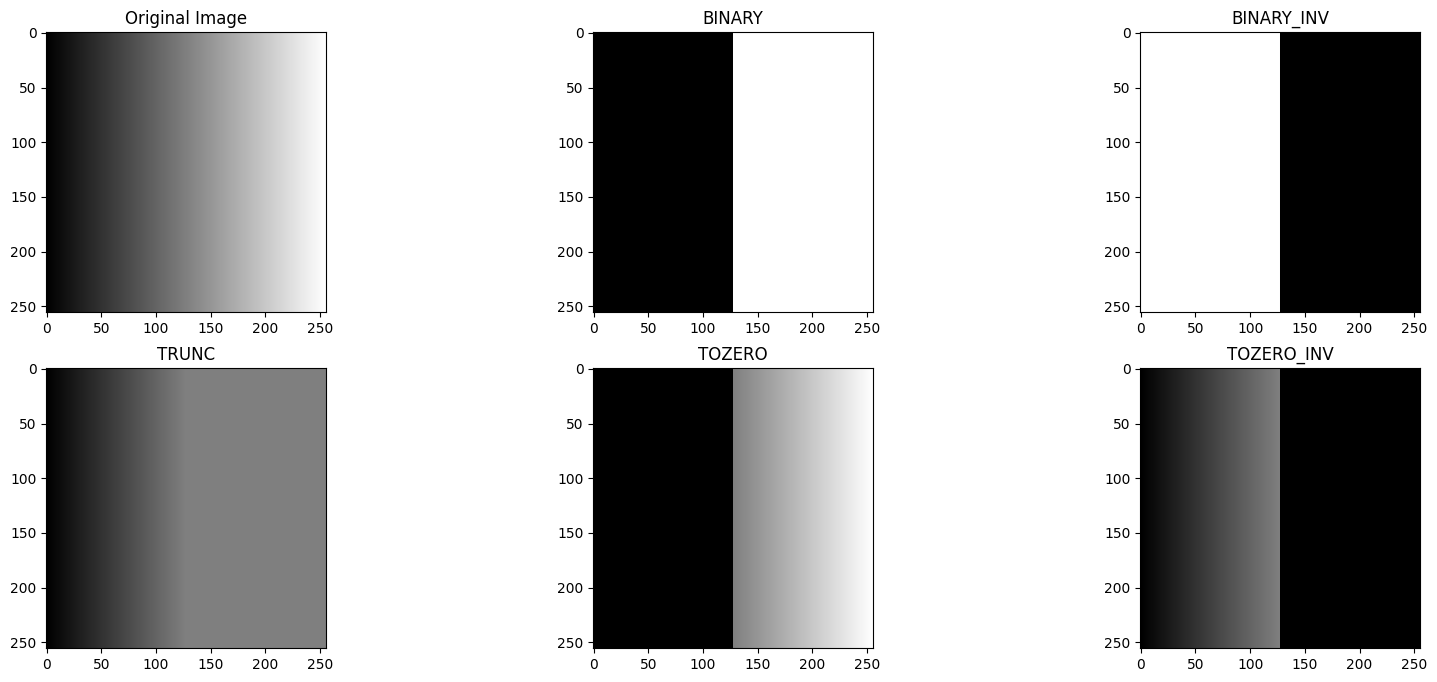

In [62]:
orig_img = cv2.imread('linear_gradient EON.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

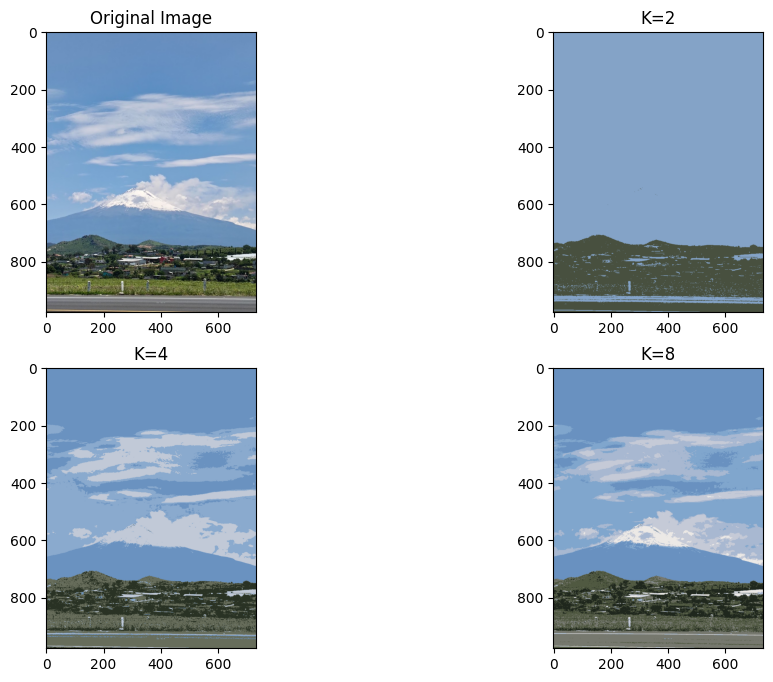

In [63]:
orig_img = cv2.imread(ruta)

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

#**Transformaciones píxel a píxel**

Las transformaciones punto a punto permiten modificar la intensidad de cada pixel de forma independiente. Estas técnicas son muy utilizadas para aumentar datasets en aprendizaje automático y mejorar la calidad visual de imágenes.

Según González y Woods (2018), tres ejemplos típicos son:

1. **Negativo de imagen**: invierte los niveles de gris para resaltar detalles oscuros.  
2. **Transformación logarítmica**: expande intensidades bajas y comprime intensidades altas.  
3. **Corrección gamma**: ajusta la luminosidad perceptual adaptando la imagen a la visión humana.


#**Ejemplo 1: Negativo**

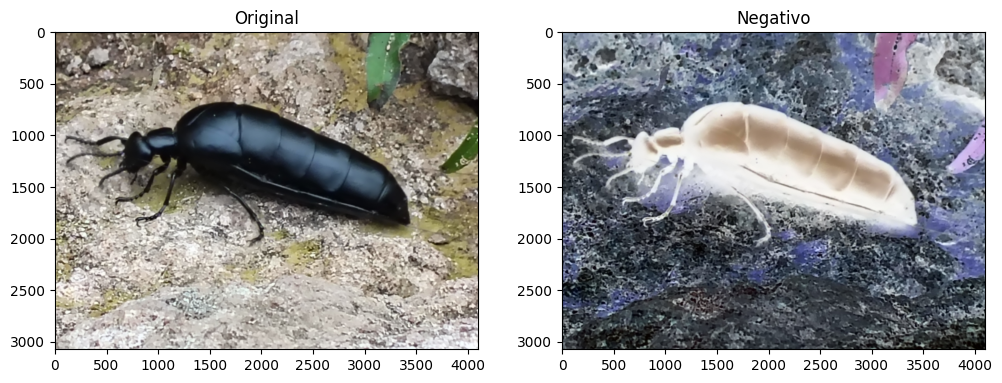

In [64]:
#Ejemplo 1: Negativo
# Definir la ruta exacta del archivo
Elinsecto = "/content/drive/MyDrive/Colab Notebooks/Vision/Elinsecto_202508311518.jpg"
# Leer imagen propia
img = cv2.imread(Elinsecto)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Transformación negativa
neg_img = 255 - img

# Mostrar resultados
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(neg_img)
ax[1].set_title("Negativo")
plt.show()


**Negativo de imagen**  
El negativo invierte los valores de intensidad: las zonas claras se vuelven oscuras y viceversa.  
Según González y Woods (2018), esta transformación resalta detalles poco visibles en regiones oscuras.  
En radiología se aplica para analizar huesos y tejidos blandos.  
En nuestro caso, aplicado al insecto, permite resaltar bordes y texturas en su caparazón oscuro.  


#**Ejemplo 2: Corrección gamma**

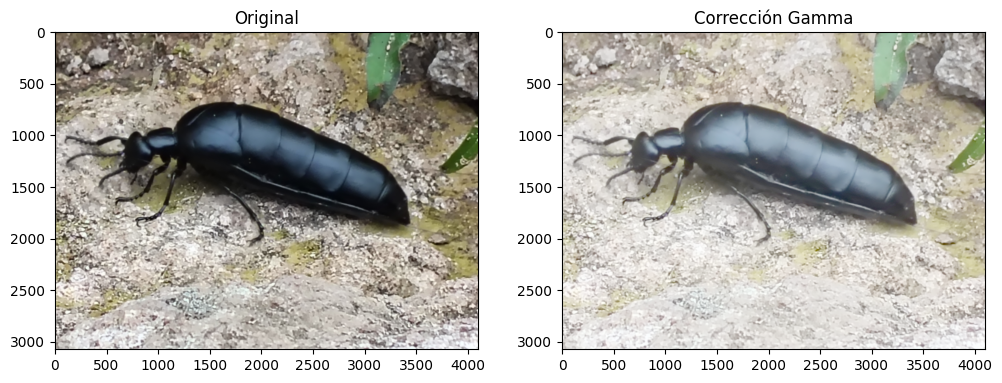

In [65]:
#Ejemplo 2: Corrección Gamma
# Corrección gamma con γ=2.2
gamma = 2.2
gamma_img = np.array(255*(img/255) ** (1/gamma), dtype='uint8')

# Mostrar
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gamma_img)
ax[1].set_title("Corrección Gamma")
plt.show()


**Corrección Gamma**  
La corrección gamma ajusta la relación entre la intensidad de los pixeles y su visualización.  
Según Poynton (2003), esta técnica compensa la no linealidad en pantallas y dispositivos de captura.  
Hoy es esencial en fotografía digital y transmisión de video.  
Aplicada a nuestra imagen, la gamma aclara regiones oscuras y mejora la percepción de detalles.  


#**Ejemplo 3: Sustracción de imágenes**

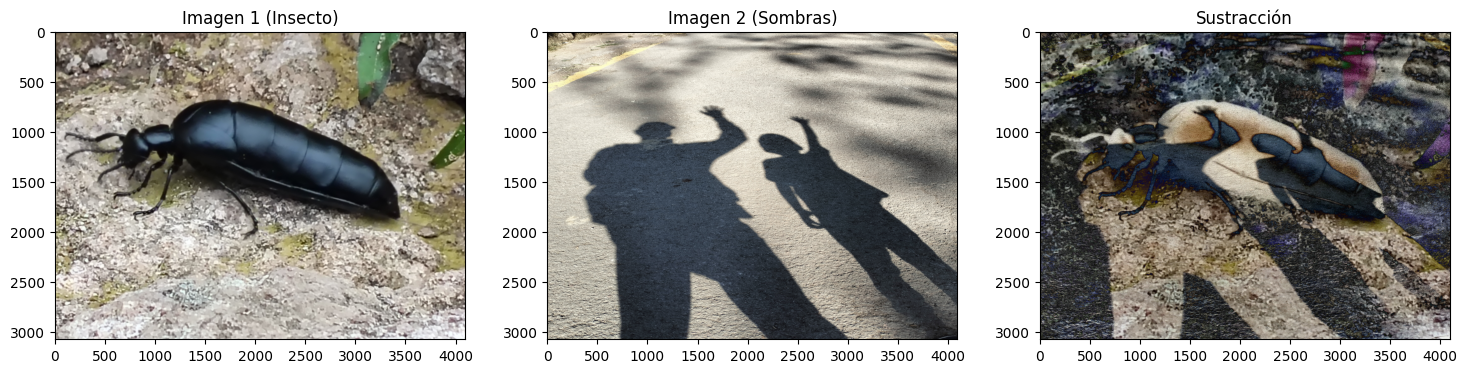

In [66]:
#Ejemplo 3: Sustracción de imágenes
# Definir la ruta exacta del archivo
Lassombras = "/content/drive/MyDrive/Colab Notebooks/Vision/Lassombras_202501261557.jpg"
# Leer segunda imagen
img2 = cv2.imread(Lassombras)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Redimensionar para que coincidan
img2_resized = cv2.resize(img2, (img.shape[1], img.shape[0]))

# Sustracción
sub_img = cv2.absdiff(img, img2_resized)

# Mostrar
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(img)
ax[0].set_title("Imagen 1 (Insecto)")
ax[1].imshow(img2_resized)
ax[1].set_title("Imagen 2 (Sombras)")
ax[2].imshow(sub_img)
ax[2].set_title("Sustracción")
plt.show()


**Sustracción de imágenes**  
La sustracción consiste en restar pixel a pixel dos imágenes alineadas.  
Piccardi (2004) señala que es la base de la detección de movimiento en visión por computador.  
En este ejemplo, se resta la imagen del insecto con la de las sombras, mostrando las diferencias en intensidades.  
Esta técnica es clave en seguridad y vigilancia (detección de intrusos o cambios en escenas).  


## **Referencias APA**

González, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Pearson.

Poynton, C. (2003). Digital Video and HDTV: Algorithms and Interfaces. Morgan Kaufmann.

Piccardi, M. (2004). Background subtraction techniques: a review. IEEE International Conference on Systems, Man and Cybernetics, 4, 3099–3104.